First 5 rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Missing values check:
age         0
sex         0
bmi        

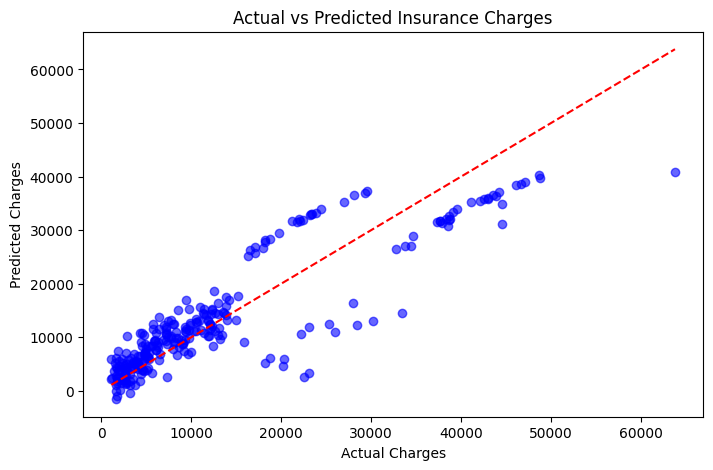

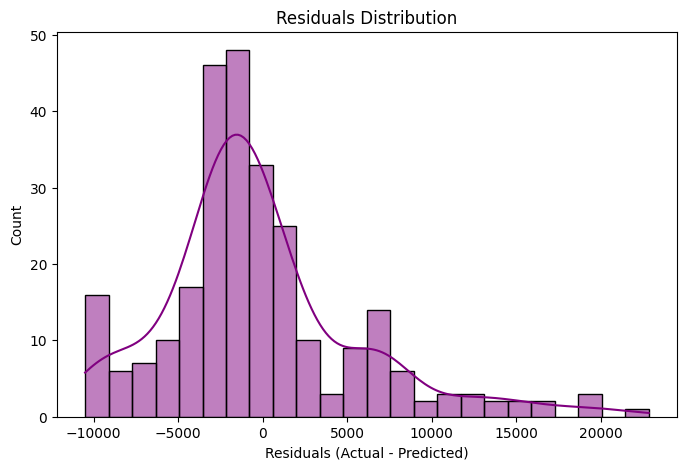

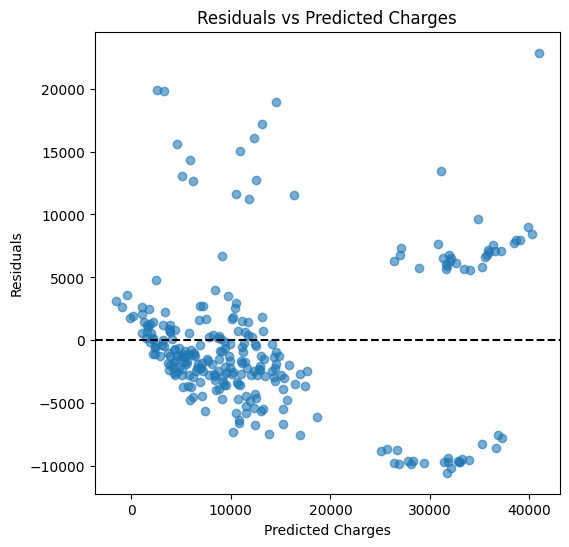

In [1]:

# Medical Insurance Cost Prediction
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#  Load Dataset
df = pd.read_csv("C:/Users/anany/OneDrive/Downloads/insurance.csv")
print("First 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing values check:")
print(df.isnull().sum())

#  Define Features and Target
X = df.drop("charges", axis=1)  # Features
y = df["charges"]               # Target

categorical_features = ["sex", "smoker", "region"]

#  Encode Categorical Features
ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(drop="first"), categorical_features)],
    remainder="passthrough"
)

X_encoded = ct.fit_transform(X)
X = np.array(X_encoded)
y = np.array(y)

print("\nFeature shape after encoding:", X.shape)

#  Split Data into Training and Testing

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

#  Train Multiple Linear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel Intercept:", model.intercept_)
print("Number of Coefficients:", len(model.coef_))


#  Predict on Test Set

y_pred = model.predict(X_test)

# ------------------------------
#  Evaluate Model
# ------------------------------
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Squared Error (MSE):", mse)
print("R² Score:", r2)

# ------------------------------
#  Feature Importance (Coefficients)
# ------------------------------
coefficients = pd.DataFrame({
    "Feature": ct.get_feature_names_out(),
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nFeature Coefficients (Impact on Charges):")
print(coefficients)

# ------------------------------
#  Predict Charges for a Sample Customer
# ------------------------------
sample = pd.DataFrame({
    "age": [40],
    "sex": ["female"],
    "bmi": [28.5],
    "children": [2],
    "smoker": ["yes"],
    "region": ["southeast"]
})

sample_encoded = ct.transform(sample)
predicted_charge = model.predict(sample_encoded)
print("\nPredicted insurance charge for sample customer:", float(predicted_charge[0]))

# ------------------------------
# Visualization: Actual vs Predicted
# ------------------------------
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.show()

# ------------------------------
# Residuals Analysis
# ------------------------------
residuals = y_test - y_pred

# Residual Distribution
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, color="purple")
plt.xlabel("Residuals (Actual - Predicted)")
plt.title("Residuals Distribution")
plt.show()

# Residuals vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
plt.title("Residuals vs Predicted Charges")
plt.show()



